In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack

import seaborn as sns

from pandas import read_csv
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn import metrics as sklearn_metrics
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense, Flatten, TimeDistributed

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from keras.layers import Permute, Reshape

Directory = ''

**DATA EXPLORATION**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features = list()

# Open the 'UCI HAR Dataset/features.txt' file and read the feature names
with open('/content/drive/MyDrive/Colab Notebooks/Ass6/3- HAR_Code/UCI HAR Dataset/features.txt') as feat:
    features = [l.split()[1] for l in feat.readlines()]

# Print the total number of features
print("Number of features = {}".format(len(features)))

# Print the feature names in a single line separated by '|'
for f in features:
    print(f, end=" | ")

Number of features = 561
tBodyAcc-mean()-X | tBodyAcc-mean()-Y | tBodyAcc-mean()-Z | tBodyAcc-std()-X | tBodyAcc-std()-Y | tBodyAcc-std()-Z | tBodyAcc-mad()-X | tBodyAcc-mad()-Y | tBodyAcc-mad()-Z | tBodyAcc-max()-X | tBodyAcc-max()-Y | tBodyAcc-max()-Z | tBodyAcc-min()-X | tBodyAcc-min()-Y | tBodyAcc-min()-Z | tBodyAcc-sma() | tBodyAcc-energy()-X | tBodyAcc-energy()-Y | tBodyAcc-energy()-Z | tBodyAcc-iqr()-X | tBodyAcc-iqr()-Y | tBodyAcc-iqr()-Z | tBodyAcc-entropy()-X | tBodyAcc-entropy()-Y | tBodyAcc-entropy()-Z | tBodyAcc-arCoeff()-X,1 | tBodyAcc-arCoeff()-X,2 | tBodyAcc-arCoeff()-X,3 | tBodyAcc-arCoeff()-X,4 | tBodyAcc-arCoeff()-Y,1 | tBodyAcc-arCoeff()-Y,2 | tBodyAcc-arCoeff()-Y,3 | tBodyAcc-arCoeff()-Y,4 | tBodyAcc-arCoeff()-Z,1 | tBodyAcc-arCoeff()-Z,2 | tBodyAcc-arCoeff()-Z,3 | tBodyAcc-arCoeff()-Z,4 | tBodyAcc-correlation()-X,Y | tBodyAcc-correlation()-X,Z | tBodyAcc-correlation()-Y,Z | tGravityAcc-mean()-X | tGravityAcc-mean()-Y | tGravityAcc-mean()-Z | tGravityAcc-std()-X | 

**Exploring Train Data**

In [ ]:
# Read the features from the 'UCI HAR Dataset/test' folder
test = pd.DataFrame()

# Read the 'subject' data from 'UCI HAR Dataset/train/subject_test.txt' file and add it as a new column
test['subject'] = pd.read_csv(Directory + 'UCI HAR Dataset/test/subject_test.txt', header=None).squeeze('columns')

# Read the 'Activity' data from 'UCI HAR Dataset/train/y_test.txt' file and add it as a new column
test['Activity'] = pd.read_csv(Directory + 'UCI HAR Dataset/test/y_test.txt', names=['Activity']).squeeze('columns')

# Map the numerical activity codes to their corresponding names and add a new column
test['ActivityName'] = test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Display 5 random sample row from the DataFrame
test.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
691,0.292996,-0.032580,-0.060720,-0.249442,-0.137503,-0.053338,-0.288416,-0.145434,-0.007533,0.008087,...,-0.125542,-0.488720,0.432779,-0.923991,-0.935159,0.143039,0.019867,9,1,WALKING
710,0.281402,0.008559,-0.090914,-0.243959,-0.051279,-0.057249,-0.267067,-0.081747,-0.022859,-0.076423,...,0.016472,0.480114,-0.839187,-0.055956,-0.931356,0.144194,0.030419,9,1,WALKING
688,0.253894,-0.019549,-0.108537,-0.947653,-0.941530,-0.979922,-0.949212,-0.932369,-0.984209,-0.909554,...,-0.095010,-0.231781,0.145312,-0.016175,0.826863,-0.043980,-0.902635,9,6,LAYING
2217,0.275578,-0.033600,-0.120933,-0.997852,-0.948733,-0.973780,-0.998165,-0.947799,-0.971840,-0.943209,...,-0.004745,0.383760,-0.664509,0.558369,-0.823534,0.184501,-0.072056,20,5,STANDING
1790,0.152949,-0.072210,-0.062104,-0.270159,0.329570,-0.287148,-0.348430,0.273395,-0.244106,0.103509,...,0.273079,0.223061,-0.922318,0.629350,-0.727498,0.286122,0.006851,13,1,WALKING


In [ ]:
# Read the features from the 'UCI HAR Dataset/train' folder
train = pd.DataFrame()

# Read the 'subject' data from 'UCI HAR Dataset/train/subject_train.txt' file and add it as a new column
train['subject'] = pd.read_csv(Directory + 'UCI HAR Dataset/train/subject_train.txt', header=None).squeeze('columns')

# Read the 'Activity' data from 'UCI HAR Dataset/train/y_train.txt' file and add it as a new column
train['Activity'] = pd.read_csv(Directory + 'UCI HAR Dataset/train/y_train.txt', names=['Activity']).squeeze('columns')

# Map the numerical activity codes to their corresponding names and add a new column
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Display 5 random sample row from the DataFrame
train.sample(5)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
5880,0.275383,-0.023311,-0.100905,-0.986676,-0.961046,-0.959092,-0.989259,-0.959038,-0.954129,-0.915910,...,-0.013714,-0.015460,0.526077,-0.639015,-0.833228,0.212965,0.006919,27,5,STANDING
5680,0.277990,-0.013832,-0.112411,-0.996978,-0.975376,-0.975158,-0.997313,-0.973793,-0.974701,-0.943824,...,0.065219,0.008468,0.325117,-0.672058,-0.867571,0.179782,-0.025594,26,5,STANDING
6989,0.278630,-0.015151,-0.105965,-0.988512,-0.883547,-0.936080,-0.989945,-0.885186,-0.929411,-0.933214,...,0.018709,-0.022722,-0.523222,0.377009,-0.811204,0.215793,0.076400,30,5,STANDING
1486,0.278750,-0.016410,-0.113547,-0.983611,-0.923088,-0.930834,-0.988292,-0.935910,-0.943871,-0.919626,...,0.007058,-0.459679,0.677584,0.857003,-0.823178,0.193991,-0.061185,7,5,STANDING
141,0.362482,-0.003553,-0.181045,0.249549,-0.211857,-0.169262,0.181324,-0.270562,-0.144911,0.636408,...,-0.347042,-0.091059,-0.926615,0.434070,-0.771162,0.255434,0.034707,1,3,WALKING_DOWNSTAIRS


**Checking for Duplicates and Nulls**

In [ ]:
# Checking for duplicates in the train dataset
print('Duplicates in train = {}'.format(sum(train.duplicated())))

# Checking for duplicates in the test dataset
print('Duplicates in test = {}'.format(sum(test.duplicated())))

# Checking for invalid (null) values in the train dataset
print('Invalid values in train = {}'.format(train.isnull().values.sum()))

# Checking for invalid (null) values in the test dataset
print('Invalid values in test = {}'.format(test.isnull().values.sum()))

Duplicates in train = 0
Duplicates in test = 0
Invalid values in train = 0
Invalid values in test = 0


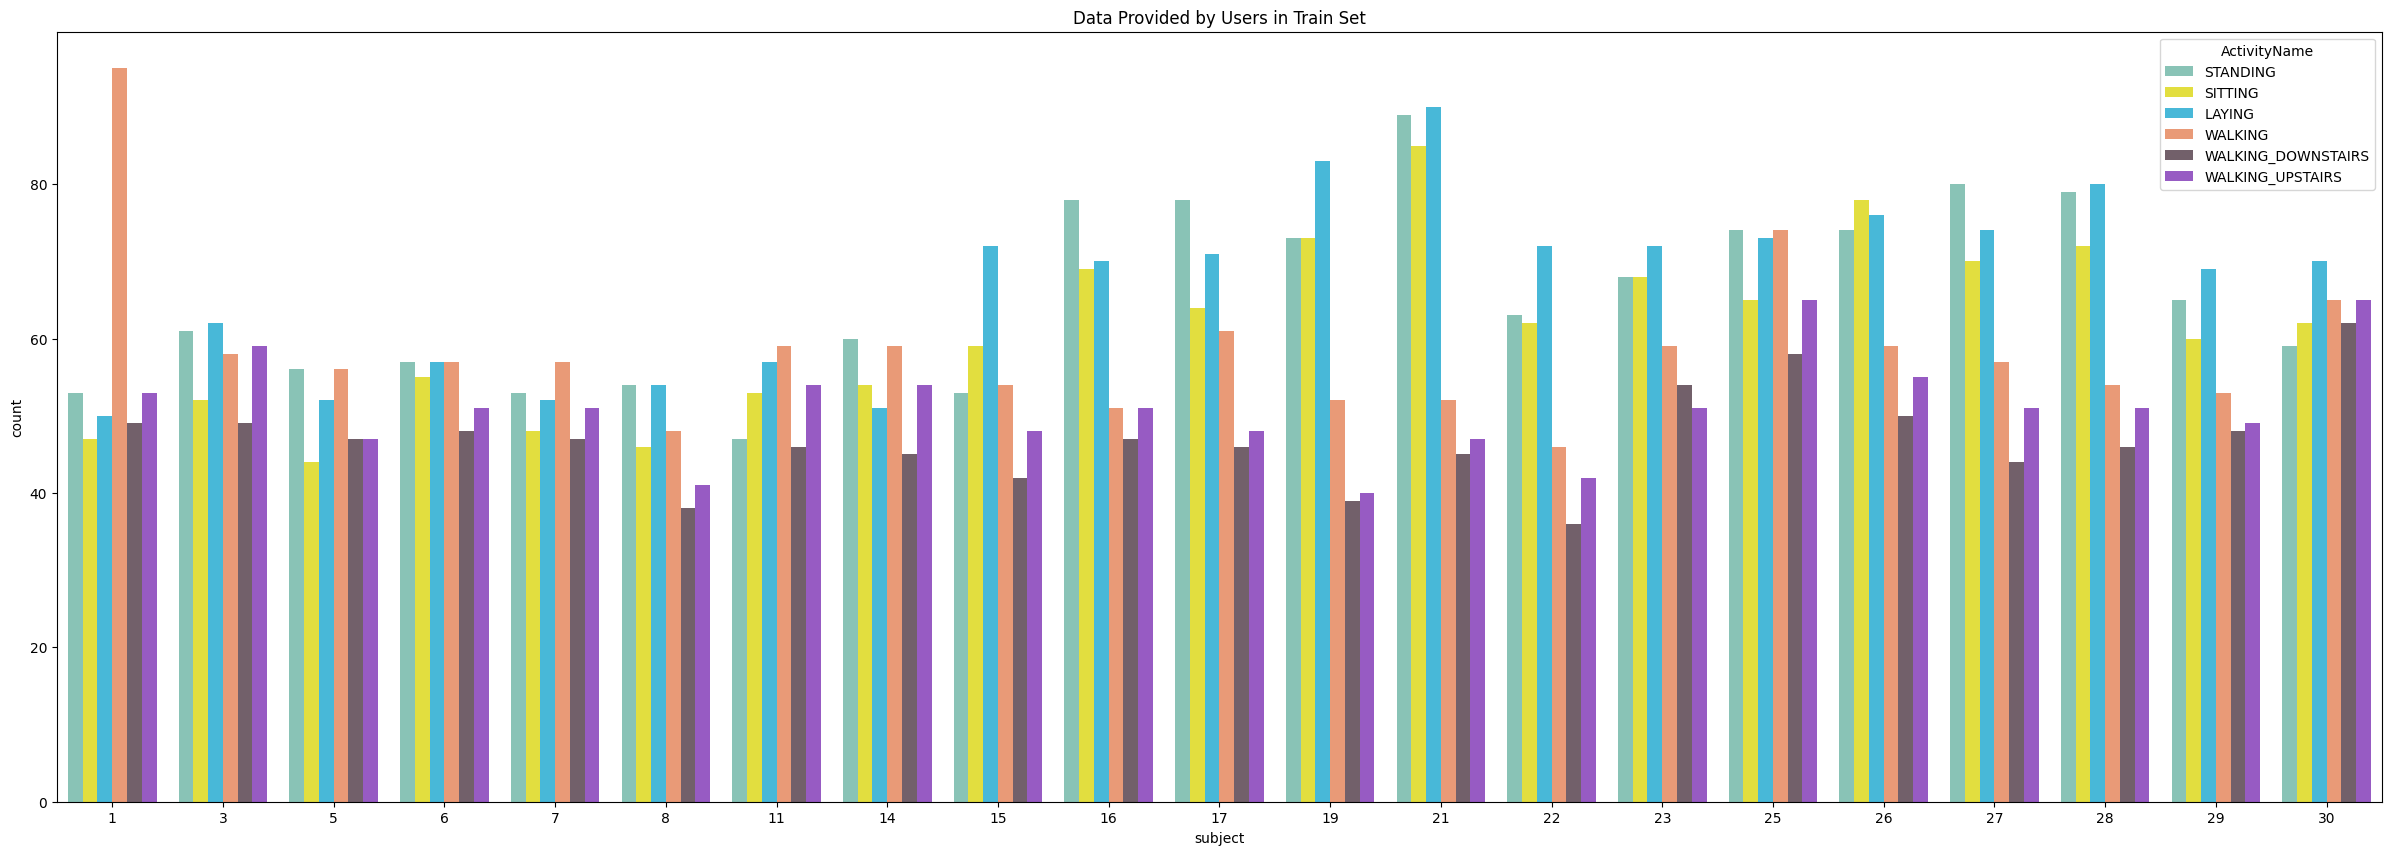

In [ ]:
 # Setting the figure size
pyplot.figure(figsize=(30, 10))

# Creating a count plot
sns.countplot(x='subject', hue='ActivityName', palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"], data=train)

# Adding a title to the plot
pyplot.title('Data Provided by Users in Train Set')

# Displaying the plot
pyplot.show()


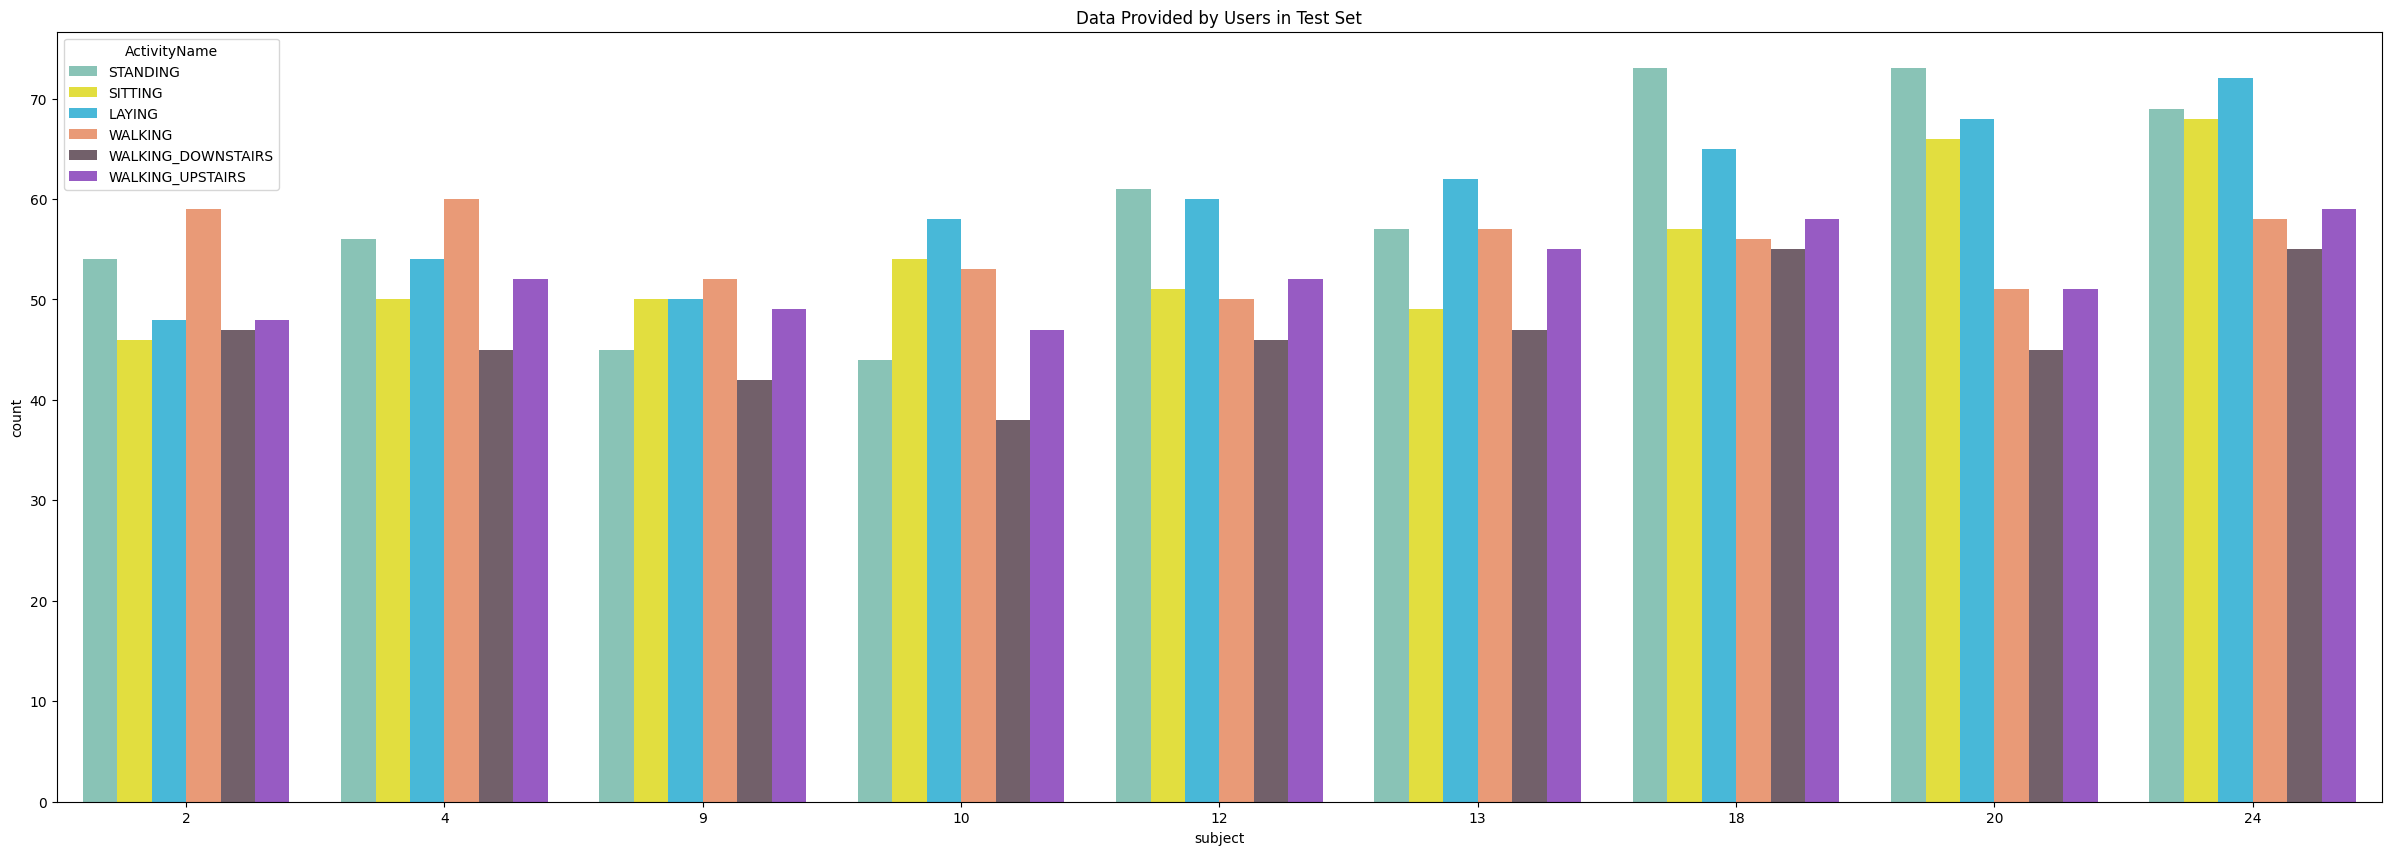

In [ ]:
# Setting the figure size
pyplot.figure(figsize=(30, 10))

# Creating a count plot
sns.countplot(x='subject', hue='ActivityName', palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"], data=test)

# Adding a title to the plot
pyplot.title('Data Provided by Users in Test Set')

# Displaying the plot
pyplot.show()

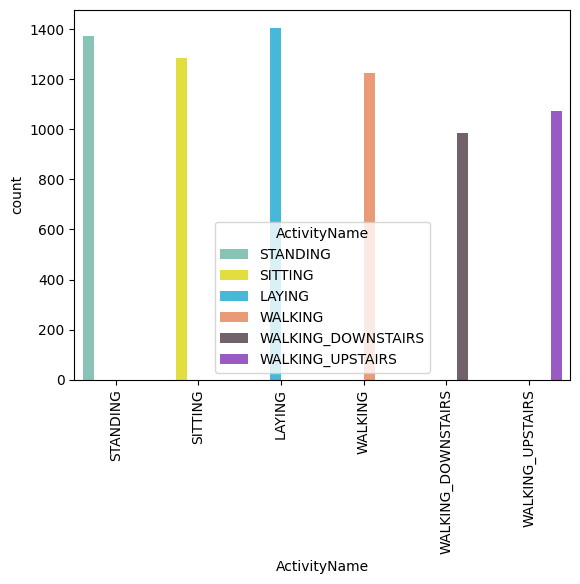

In [ ]:
sns.countplot(x="ActivityName",
               hue='ActivityName',
               palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"],
               data=train)
pyplot.xticks(rotation=90)
pyplot.show()

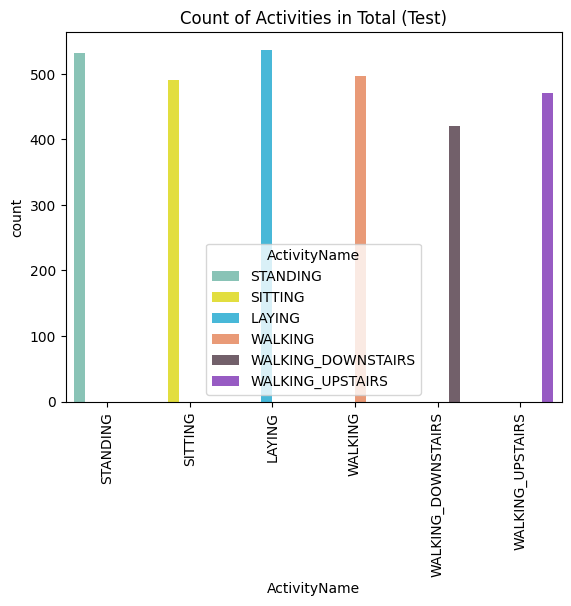

In [ ]:
pyplot.title('Count of Activities in Total (Test)')
sns.countplot(x="ActivityName",
               hue='ActivityName',
               palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"],
               data=test)
pyplot.xticks(rotation=90)
pyplot.show()

**CNN-LSTM Model**

In [8]:
def file_load(filepath):
    # Load the file into a DataFrame using read_csv
    df = read_csv(filepath, header=None, delim_whitespace=True)

    # Return the values of the DataFrame
    return df.values

In [7]:
def train_test_append(filenames, append_before=''):
    # Initialize an empty list to store the loaded data
    datalist = list()

    # Iterate through each filename in the provided list
    for name in filenames:
        # Load the file using the file_load function
        data = file_load(append_before + name)

        # Append the loaded data to the list
        datalist.append(data)

    # Stack the data along the third axis (axis=2)
    datalist = dstack(datalist)

    # Return the stacked data
    return datalist

In [6]:

def inertial_signals_load(group, append_before=''):
    # Construct the file path for the Inertial Signals directory
    filepath = append_before + group + '/Inertial Signals/'

    # List of filenames for different signals
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']

    # Load the inertial signals data using the train_test_append function
    X = train_test_append(filenames, filepath)

    # Load the corresponding activity labels (y) using the file_load function
    y = file_load(append_before + group + '/y_'+group+'.txt')

    # Return the loaded inertial signals data (X) and activity labels (y)
    return X, y

In [5]:
def load_dataset(append_before=''):
    # Load training set inertial signals and labels
    trainX, trainy = inertial_signals_load('train', append_before + 'UCI HAR Dataset/')

    # Load testing set inertial signals and labels
    testX, testy = inertial_signals_load('test', append_before + 'UCI HAR Dataset/')

    # Adjust labels to start from 0
    trainy = trainy - 1
    testy = testy - 1

    # Convert labels to one-hot encoded format
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)

    # Print shapes of the loaded data
    print("X Train shape:", trainX.shape)
    print("Y Train Shape:", trainy.shape)
    print("X Test  shape:", testX.shape)
    print("Y Test  shape:", testy.shape)

    # Return the loaded data and labels
    return trainX, trainy, testX, testy


In [10]:
trainX, trainy, testX, testy = load_dataset(Directory)

# Concatenate along axis 0 (assuming you want to concatenate along the first dimension)
X_combined = np.concatenate((trainX, testX), axis=0)
Y_combined = np.concatenate((trainy, testy), axis=0)

# Print the shapes of the concatenated arrays
print("\nX Combined shape:", X_combined.shape)
print("Y Combined shape:", Y_combined.shape)


test_size = 0.1
# Calculate the number of samples for the test set
test_samples = int(len(X_combined) * test_size)

# Perform the initial time-based train-test split
trainX, testX = X_combined[:-test_samples], X_combined[-test_samples:]
trainy, testy = Y_combined[:-test_samples], Y_combined[-test_samples:]

# OW/NOW => comment for OW
trainX = np.take(trainX, indices=np.arange(64), axis=1)
testX = np.take(testX, indices=np.arange(64), axis=1)

# Print the shapes of the reshaped data
print("\nX Train  shape and type:"  , trainX.shape,type(trainX))
print("X Test   shape and type:"    , testX.shape ,type(testX))
print("Y Test   shape and type:"    , trainy.shape,type(trainy))
print("Y Test   shape and type:"    , testy.shape ,type(testy))

X Train shape: (7352, 128, 9)
Y Train Shape: (7352, 6)
X Test  shape: (2947, 128, 9)
Y Test  shape: (2947, 6)

X Combined shape: (10299, 128, 9)
Y Combined shape: (10299, 6)

X Train  shape and type: (9270, 64, 9) <class 'numpy.ndarray'>
X Test   shape and type: (1029, 64, 9) <class 'numpy.ndarray'>
Y Test   shape and type: (9270, 6) <class 'numpy.ndarray'>
Y Test   shape and type: (1029, 6) <class 'numpy.ndarray'>


In [11]:
# Set parameters for the model
verbose, epochs, batch_size = 1, 182, 64
n_timesteps = trainX.shape[1]
n_features = trainX.shape[2]
n_outputs = trainy.shape[1]
n_steps = 1
n_length = 64

# Reshape the data for the CNN-LSTM model
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

# Print the shapes of the reshaped data
print("Train  shape:", trainX.shape)
print("Test   shape:", testX.shape)


Train  shape: (9270, 1, 64, 9)
Test   shape: (1029, 1, 64, 9)


In [12]:
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
tscv = TimeSeriesSplit(n_splits=n_splits)

In [13]:
for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f"validation fold {fold}/{n_splits}", min(val_index),max(val_index), val_index.shape)

for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f"Train fold {fold}/{n_splits}", min(train_index),max(train_index), train_index.shape)

validation fold 0/10 850 1691 (842,)
validation fold 1/10 1692 2533 (842,)
validation fold 2/10 2534 3375 (842,)
validation fold 3/10 3376 4217 (842,)
validation fold 4/10 4218 5059 (842,)
validation fold 5/10 5060 5901 (842,)
validation fold 6/10 5902 6743 (842,)
validation fold 7/10 6744 7585 (842,)
validation fold 8/10 7586 8427 (842,)
validation fold 9/10 8428 9269 (842,)
Train fold 0/10 0 849 (850,)
Train fold 1/10 0 1691 (1692,)
Train fold 2/10 0 2533 (2534,)
Train fold 3/10 0 3375 (3376,)
Train fold 4/10 0 4217 (4218,)
Train fold 5/10 0 5059 (5060,)
Train fold 6/10 0 5901 (5902,)
Train fold 7/10 0 6743 (6744,)
Train fold 8/10 0 7585 (7586,)
Train fold 9/10 0 8427 (8428,)



Fold 1/10:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_143 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_144 (Time  (None, None, 31, 507)     0         
 Distributed)                                                    
                                                                 
 time_distributed_145 (Time  (None, None, 31, 507)     0         
 Distributed)                                                    
                                                                 
 time_distributed_146 (Time  (None, None, 29, 111)     168942    
 Distributed)                                                    
                                                                 
 time_distributed_147 (Time  (None, None,

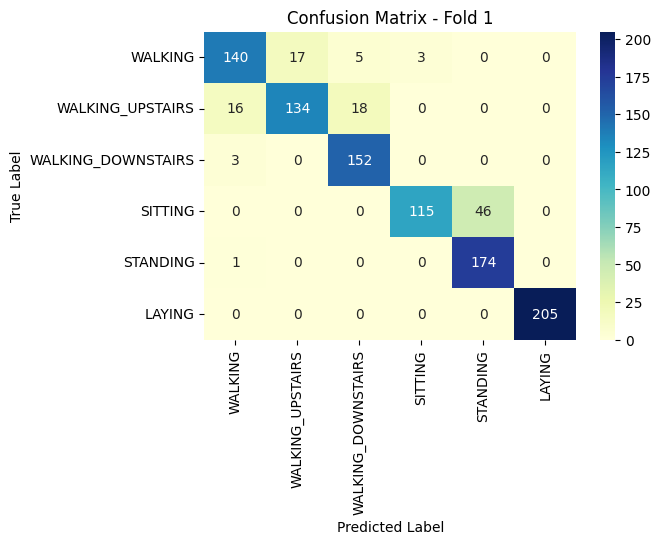

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       165
           1       0.89      0.80      0.84       168
           2       0.87      0.98      0.92       155
           3       0.97      0.71      0.82       161
           4       0.79      0.99      0.88       175
           5       1.00      1.00      1.00       205

    accuracy                           0.89      1029
   macro avg       0.90      0.89      0.89      1029
weighted avg       0.90      0.89      0.89      1029


Fold 2/10:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_156 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_157 (Time  (None, None, 31, 507)     0         
 Distributed)             

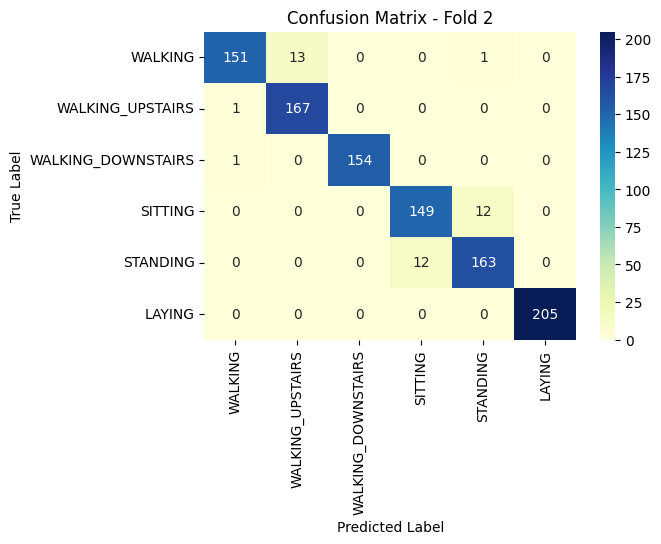

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       165
           1       0.93      0.99      0.96       168
           2       1.00      0.99      1.00       155
           3       0.93      0.93      0.93       161
           4       0.93      0.93      0.93       175
           5       1.00      1.00      1.00       205

    accuracy                           0.96      1029
   macro avg       0.96      0.96      0.96      1029
weighted avg       0.96      0.96      0.96      1029


Fold 3/10:
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_169 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_170 (Time  (None, None, 31, 507)     0         
 Distributed)             

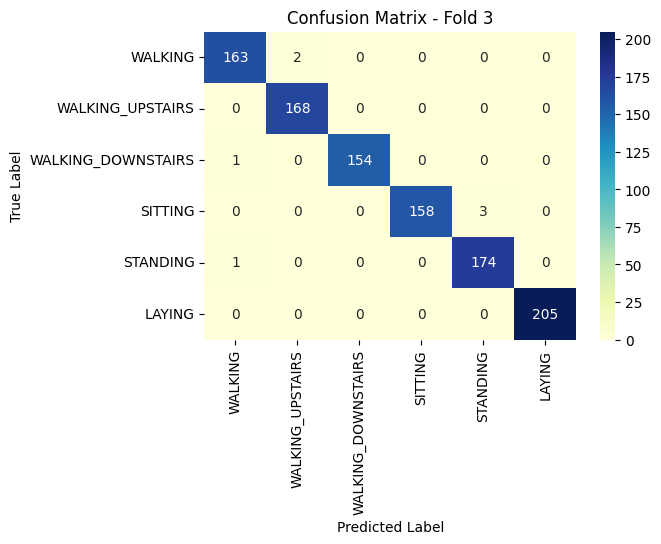

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       165
           1       0.99      1.00      0.99       168
           2       1.00      0.99      1.00       155
           3       1.00      0.98      0.99       161
           4       0.98      0.99      0.99       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 4/10:
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_182 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_183 (Time  (None, None, 31, 507)     0         
 Distributed)             

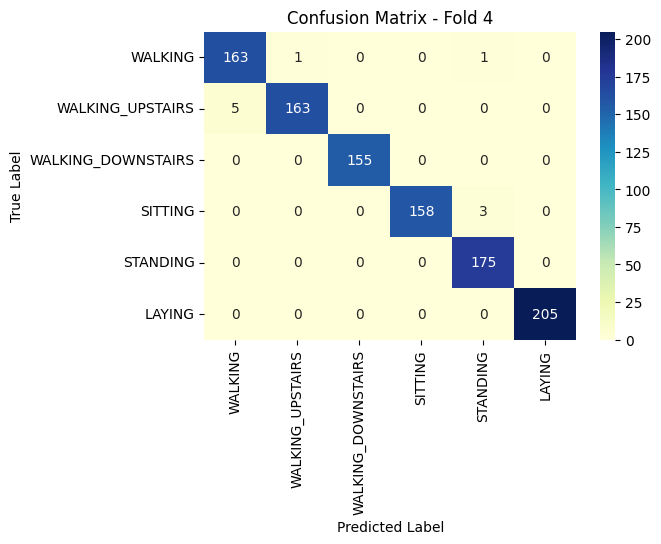

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       165
           1       0.99      0.97      0.98       168
           2       1.00      1.00      1.00       155
           3       1.00      0.98      0.99       161
           4       0.98      1.00      0.99       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 5/10:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_195 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_196 (Time  (None, None, 31, 507)     0         
 Distributed)             

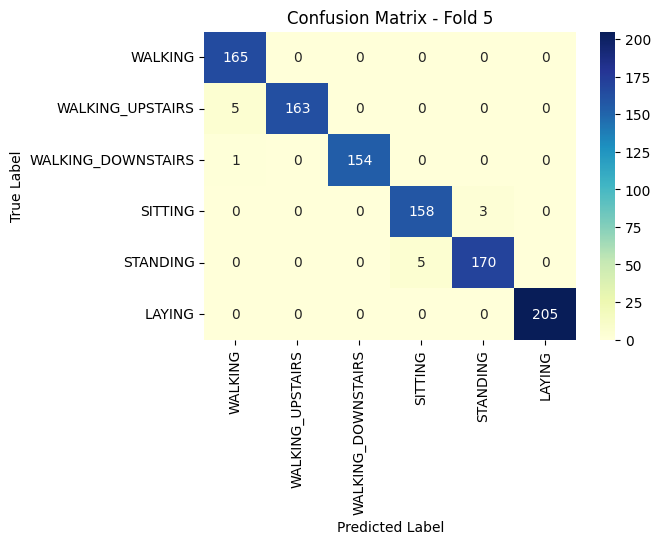

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       165
           1       1.00      0.97      0.98       168
           2       1.00      0.99      1.00       155
           3       0.97      0.98      0.98       161
           4       0.98      0.97      0.98       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 6/10:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_208 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_209 (Time  (None, None, 31, 507)     0         
 Distributed)             

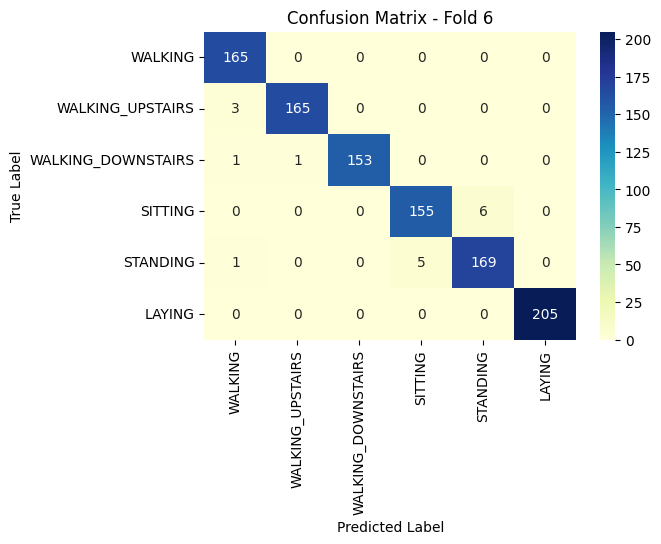

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       165
           1       0.99      0.98      0.99       168
           2       1.00      0.99      0.99       155
           3       0.97      0.96      0.97       161
           4       0.97      0.97      0.97       175
           5       1.00      1.00      1.00       205

    accuracy                           0.98      1029
   macro avg       0.98      0.98      0.98      1029
weighted avg       0.98      0.98      0.98      1029


Fold 7/10:
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_221 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_222 (Time  (None, None, 31, 507)     0         
 Distributed)             

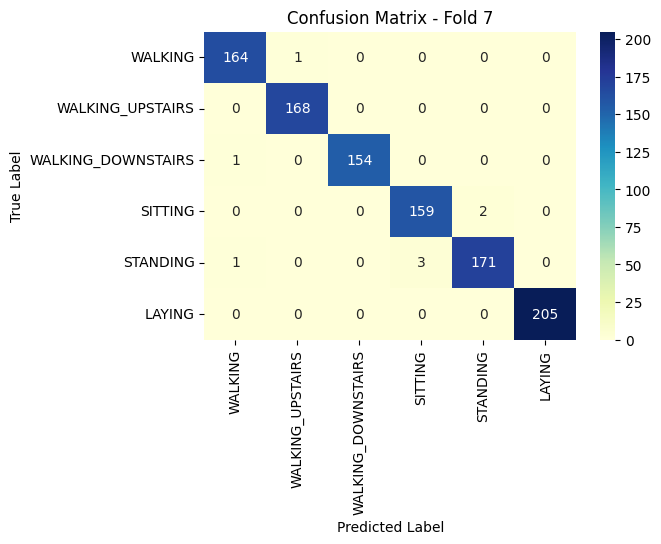

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       165
           1       0.99      1.00      1.00       168
           2       1.00      0.99      1.00       155
           3       0.98      0.99      0.98       161
           4       0.99      0.98      0.98       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 8/10:
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_234 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_235 (Time  (None, None, 31, 507)     0         
 Distributed)             

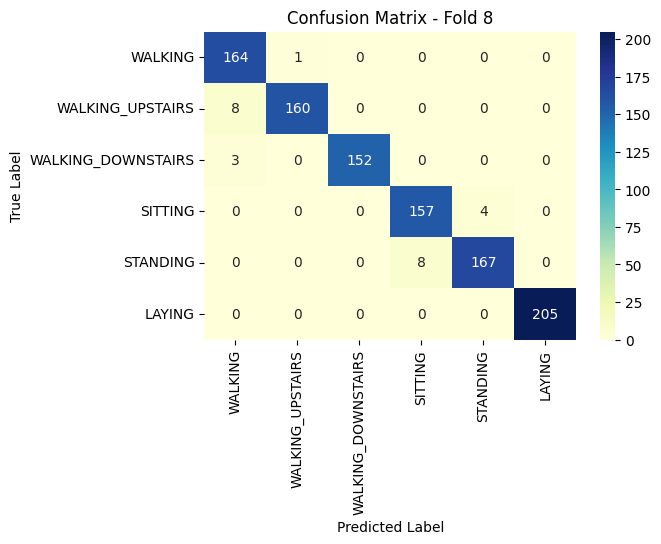

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       165
           1       0.99      0.95      0.97       168
           2       1.00      0.98      0.99       155
           3       0.95      0.98      0.96       161
           4       0.98      0.95      0.97       175
           5       1.00      1.00      1.00       205

    accuracy                           0.98      1029
   macro avg       0.98      0.98      0.98      1029
weighted avg       0.98      0.98      0.98      1029


Fold 9/10:
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_247 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_248 (Time  (None, None, 31, 507)     0         
 Distributed)             

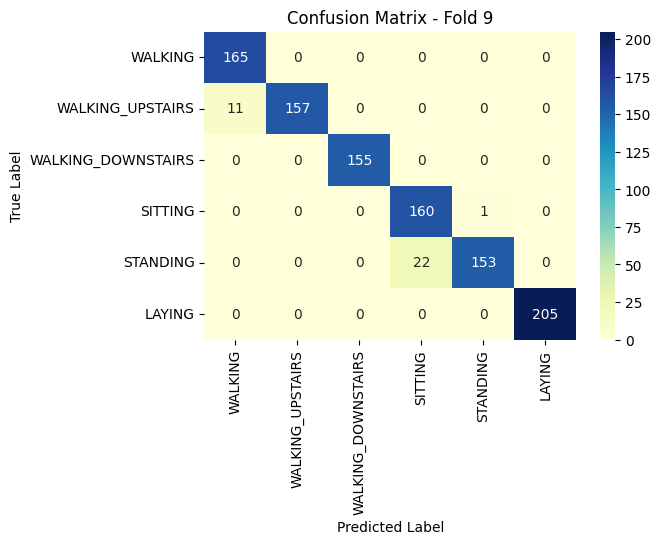

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       165
           1       1.00      0.93      0.97       168
           2       1.00      1.00      1.00       155
           3       0.88      0.99      0.93       161
           4       0.99      0.87      0.93       175
           5       1.00      1.00      1.00       205

    accuracy                           0.97      1029
   macro avg       0.97      0.97      0.97      1029
weighted avg       0.97      0.97      0.97      1029


Fold 10/10:
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_260 (Time  (None, None, 62, 507)     14196     
 Distributed)                                                    
                                                                 
 time_distributed_261 (Time  (None, None, 31, 507)     0         
 Distributed)            

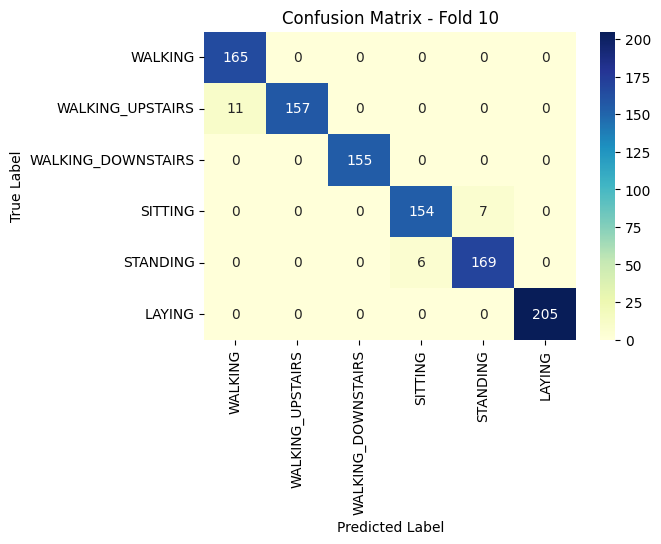

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       165
           1       1.00      0.93      0.97       168
           2       1.00      1.00      1.00       155
           3       0.96      0.96      0.96       161
           4       0.96      0.97      0.96       175
           5       1.00      1.00      1.00       205

    accuracy                           0.98      1029
   macro avg       0.98      0.98      0.98      1029
weighted avg       0.98      0.98      0.98      1029



In [17]:
# Create an empty list to store Accuracies for each fold
fold_accuracies=[]

# Create an empty list to store confusion matrices for each fold
fold_confusion_matrices = []
#Labels for Confusion marix
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f'\nFold {fold + 1}/{n_splits}:')

    # Split the data into training and validation sets for this fold (valid size = 10% of trian)
    X_train, X_val = trainX[train_index], trainX[val_index]
    y_train, y_val = trainy[train_index], trainy[val_index]

    #############################################################################################
    model = Sequential()

    # Convolutional layer 1
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=507, activation='relu'), input_shape=(None, n_length, n_features)))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 2
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=111, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 3
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=468, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 4
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=509, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Flatten layer with time distribution
    model.add(TimeDistributed(Flatten()))

    # LSTM layer
    model.add(LSTM(127))

    model.add(Dropout(0.27907))

    # Dense (fully connected) layer with ReLU activation
    model.add(Dense(772, activation='relu'))

    # Output layer with softmax activation (for multi-class classification)
    model.add(Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display the model summary
    model.summary()

    #############################################################################################

    # Train the model on the current fold
    history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=verbose)
    # history=model.fit(X_train, y_train, validation_data=(testX, testy), epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(testX, testy, verbose=verbose)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')
    # Append the accuracy to the list
    fold_accuracies.append(test_acc)

    # Make predictions on the test set
    y_pred = model.predict(testX)
    max_y_pred = np.argmax(y_pred, axis=1)
    max_y_test = np.argmax(testy, axis=1)

    # Calculate confusion matrix for this fold
    fold_confusion_matrix = sklearn_metrics.confusion_matrix(max_y_test, max_y_pred)

    # Append the confusion matrix to the list
    fold_confusion_matrices.append(fold_confusion_matrix)

    # Visualize the confusion matrix for this fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(fold_confusion_matrix, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    clr = sklearn_metrics.classification_report(max_y_test, max_y_pred)
    print(clr)

In [18]:
# Calculate and print the average accuracy

for i in range(n_splits):
    print(f'fold {i+1}/{n_splits} Accuracy = {fold_accuracies[i] * 1:.4f}')

print(f'\nHighst Accuracy: {np.max(fold_accuracies) * 1:.4f}')
print(f'Lowest Accuracy: {np.min(fold_accuracies) * 1:.4f}')
print(f'\nFinal Average Accuracy: {np.mean(fold_accuracies) * 1:.4f} ± {np.std(fold_accuracies) * 1:.4f}')

fold 1/10 Accuracy = 0.8941
fold 2/10 Accuracy = 0.9611
fold 3/10 Accuracy = 0.9932
fold 4/10 Accuracy = 0.9903
fold 5/10 Accuracy = 0.9864
fold 6/10 Accuracy = 0.9835
fold 7/10 Accuracy = 0.9922
fold 8/10 Accuracy = 0.9767
fold 9/10 Accuracy = 0.9670
fold 10/10 Accuracy = 0.9767

Highst Accuracy: 0.9932
Lowest Accuracy: 0.8941

Final Average Accuracy: 0.9721 ± 0.0279
